This project builds a model that predicts the number of responses to a marketing offer.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from scipy import stats
import statsmodels.formula.api as sm
import statsmodels.stats.stattools as tools
import statsmodels
from statsmodels.api import add_constant, OLS
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy as sp
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Marketing-Analytics/Data/offer_responses.csv')
df.head()

,responses,offer_discount,offer_quality,offer_reach
0,4151.0,26.0,10.257680,31344.0
1,3397.0,35.0,15.194380,24016.0
2,3274.0,21.0,13.971468,28832.0
3,3426.0,27.0,6.054338,26747.0
4,5745.0,42.0,16.801365,46968.0


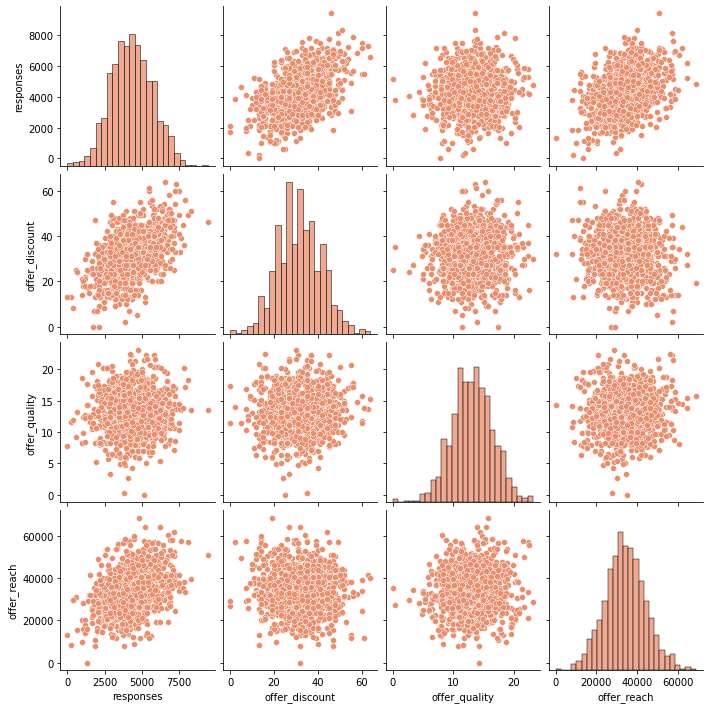

In [ ]:
# Pair plot

sns.set_palette('flare')
sns.pairplot(df)
plt.show()

In [ ]:
df.corr()

,responses,offer_discount,offer_quality,offer_reach
responses,1.000000,0.536378,0.032054,0.411912
offer_discount,0.536378,1.000000,0.016937,-0.053458
offer_quality,0.032054,0.016937,1.000000,0.029935
offer_reach,0.411912,-0.053458,0.029935,1.000000


In [ ]:
X = df[['offer_quality', 'offer_discount', 'offer_reach']]
X = add_constant(X)
y = df['responses']

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              responses   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     309.5
Date:                Fri, 11 Feb 2022   Prob (F-statistic):          6.12e-142
Time:                        12:57:55   Log-Likelihood:                -8320.2
No. Observations:                1000   AIC:                         1.665e+04
Df Residuals:                     996   BIC:                         1.667e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -304.8442    195.130     -1.562      0.119    -687.757      78.069
offer_quality      3.8562      9.404      0.410      0.682     -14.597      22.309
offer_discount    77.8652      3.176     24.520      0.000      71.634      84.097
offer_reach        0.0617      0.003     19.334      0.000       0.055       0.068
==============================================================================
Omnibus:                        0.343   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.429
Skew:                           0.025   Prob(JB):                        0.807
Kurtosis:                       2.912   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


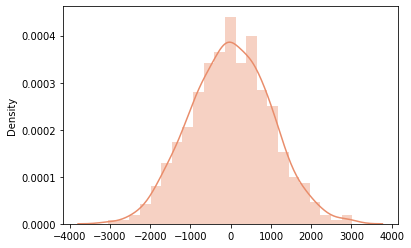

In [ ]:
# histogram of residuals

sns.distplot(results.resid)

In [ ]:
print('RMSE model: ', results.mse_resid**0.5)

RMSE model:  995.4761040416838


offer_quality is not a significant variable. 

In [ ]:
X = df[['offer_discount', 'offer_reach']]
X = add_constant(X)
y = df['responses']

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              responses   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     464.6
Date:                Fri, 11 Feb 2022   Prob (F-statistic):          2.74e-143
Time:                        12:57:56   Log-Likelihood:                -8320.2
No. Observations:                1000   AIC:                         1.665e+04
Df Residuals:                     997   BIC:                         1.666e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -256.3617    155.171     -1.652      0.099    -560.861      48.138
offer_discount    77.8894      3.174     24.542      0.000      71.661      84.117
offer_reach        0.0617      0.003     19.364      0.000       0.055       0.068
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.345
Skew:                           0.021   Prob(JB):                        0.842
Kurtosis:                       2.919   Cond. No.                     1.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


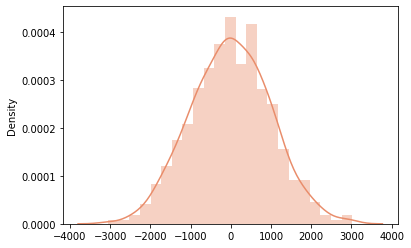

In [ ]:
# histogram of residuals

sns.distplot(results.resid)

In [ ]:
print('RMSE model: ', results.mse_resid**0.5)

RMSE model:  995.0607365593909


The model improved only slightly after removing offer_quality. 